# Using Wikipedia, Pandas, and Folium visualize all the Ancient Libraries and Where they were

# Packages

In [1]:
import pandas as pd
import wikipedia
import geopandas as gpd
%matplotlib inline  
import folium
import os
import regex as re
import numpy as np

# Variables

In [2]:
w_page = "List of libraries in the ancient world"
col_names = ["RAW_TEXT", "NAME", "EXTRA"]
output_table = "test.csv"
countries = "ne_50m_admin_0_countries.shp"

# Read in Wiki page as variable

In [3]:
w_page = wikipedia.page(w_page)
text = w_page.content
text

'The great libraries of the ancient world served as archives for empires, sanctuaries for sacred writings, and depositories of literature and chronicles.\n\n\n== Algeria ==\nTimgad (250 A.D.) (modern Algeria)The library was a gift to the Roman people and province of Thamugadi or Timgad by  Julius Quintianus Flavius Rogatianus in the third century. The library contained an expansive arched hall which consisted of a reading room, stack room, and a rotunda for lectures. The library was quite large measuring eighty one feet in length by seventy seven feet in width. Oblong alcoves held wooden cabinets along walls of which the manuscripts were maintained. In addition there is evidence for free-standing bookcases in the center as well as a reading desk. There is no evidence as to how many books the library harbored although it is estimated that it could have accommodated 3000 scrolls.\n\n\n== Anatolia ==\nHattusa (1900 B.C. - 1190 B.C.) (modern Bogazkoy)This archive constituted the largest co

# Save as text and read back in

In [4]:
open('temp.txt', 'a').close()
with open('temp.txt', "w", encoding="utf-8") as f:
    f.write(text)

# Read text into pandas and split text up

In [5]:
df = pd.read_csv('temp.txt', sep = '==',  header = None, skiprows =1)
df.columns = col_names
df

C:\Users\fcmun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,RAW_TEXT,NAME,EXTRA
0,NaN,Algeria,NaN
1,Timgad (250 A.D.) (modern Algeria)The library ...,None,NaN
2,NaN,Anatolia,NaN
3,Hattusa (1900 B.C. - 1190 B.C.) (modern Bogazk...,None,NaN
4,Royal Library of Antioch (221 B.C. - 363 A.D.)...,None,NaN
5,Library of Pergamum (197 B.C. - 159 B.C.) (mod...,None,NaN
6,Library of Celsus (135 A.D. - 262) (located wi...,None,NaN
7,The Imperial Library of Constantinople (337â€...,None,NaN
8,NaN,China,NaN
9,Han Imperial Library. Catalogue preserved in t...,None,NaN


# Fill NAME column populating the country for each library

In [6]:
df.iloc[:, 1] = df.iloc[:, 1].fillna(method='ffill')
df2 = df[pd.notnull(df.iloc[:, 0])]
df2


,RAW_TEXT,NAME,EXTRA
1,Timgad (250 A.D.) (modern Algeria)The library ...,Algeria,NaN
3,Hattusa (1900 B.C. - 1190 B.C.) (modern Bogazk...,Anatolia,NaN
4,Royal Library of Antioch (221 B.C. - 363 A.D.)...,Anatolia,NaN
5,Library of Pergamum (197 B.C. - 159 B.C.) (mod...,Anatolia,NaN
6,Library of Celsus (135 A.D. - 262) (located wi...,Anatolia,NaN
7,The Imperial Library of Constantinople (337â€...,Anatolia,NaN
9,Han Imperial Library. Catalogue preserved in t...,China,NaN
10,Qin reign (third century BCE): It was the prac...,China,NaN
11,Tang dynasty (6thâ€“10th century): The Tang Dy...,China,NaN
13,"The Royal Library of Alexandria, Egypt, fl. 3r...",Egypt,NaN


# Cleanup data.  Remove extra character and spaces.  Replace Anatolia with Turkey.  

In [7]:
df2.iloc[:, 1] = df2.iloc[:, 1].str.replace('=','')
df2.iloc[:, 1] = df2.iloc[:, 1].str.replace(' ','')
df2.iloc[:, 1] = df2.iloc[:, 1].str.replace('Anatolia','Turkey')
df2

C:\Users\fcmun\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,RAW_TEXT,NAME,EXTRA
1,Timgad (250 A.D.) (modern Algeria)The library ...,Algeria,NaN
3,Hattusa (1900 B.C. - 1190 B.C.) (modern Bogazk...,Turkey,NaN
4,Royal Library of Antioch (221 B.C. - 363 A.D.)...,Turkey,NaN
5,Library of Pergamum (197 B.C. - 159 B.C.) (mod...,Turkey,NaN
6,Library of Celsus (135 A.D. - 262) (located wi...,Turkey,NaN
7,The Imperial Library of Constantinople (337â€...,Turkey,NaN
9,Han Imperial Library. Catalogue preserved in t...,China,NaN
10,Qin reign (third century BCE): It was the prac...,China,NaN
11,Tang dynasty (6thâ€“10th century): The Tang Dy...,China,NaN
13,"The Royal Library of Alexandria, Egypt, fl. 3r...",Egypt,NaN


# Initial work to split up dates and locations

In [8]:
split1 = df2['RAW_TEXT'].str.split('(', n = 1, expand = True)
df2['Library'] = split1[0]
df2['Temp'] = split1[1]
split2 = df2['Temp'].str.split(')', n = 1, expand = True)
df2['Date'] = split2[0]
df2['Temp2'] = split2[1]
split3 = df2['Temp2'].str.split('(', n = 1, expand = True)
split4 = split3[1].str.split(')', n = 1, expand = True)
df2['Loc'] = split4[0]
df2['Extra'] = split4[1]
df2 = df2.drop(['Temp', 'Temp2'], axis=1)
df2




C:\Users\fcmun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fcmun\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fcmun\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,RAW_TEXT,NAME,EXTRA,Library,Date,Loc,Extra
1,Timgad (250 A.D.) (modern Algeria)The library ...,Algeria,NaN,Timgad,250 A.D.,modern Algeria,The library was a gift to the Roman people and...
3,Hattusa (1900 B.C. - 1190 B.C.) (modern Bogazk...,Turkey,NaN,Hattusa,1900 B.C. - 1190 B.C.,modern Bogazkoy,This archive constituted the largest collectio...
4,Royal Library of Antioch (221 B.C. - 363 A.D.)...,Turkey,NaN,Royal Library of Antioch,221 B.C. - 363 A.D.,Modern Antakya,The library was commissioned in the third cent...
5,Library of Pergamum (197 B.C. - 159 B.C.) (mod...,Turkey,NaN,Library of Pergamum,197 B.C. - 159 B.C.,modern Bergama,The Attalid kings formed the second best Helle...
6,Library of Celsus (135 A.D. - 262) (located wi...,Turkey,NaN,Library of Celsus,135 A.D. - 262,located within the city of Ephesus,This library was part of the triumvirate of li...
7,The Imperial Library of Constantinople (337â€...,Turkey,NaN,The Imperial Library of Constantinople,337â€“361 A.D. â€“ 29 May 1453,"Constantinople, modern Istanbul",The library was established by Constantius II ...
9,Han Imperial Library. Catalogue preserved in t...,China,NaN,Han Imperial Library. Catalogue preserved in t...,None,None,None
10,Qin reign (third century BCE): It was the prac...,China,NaN,Qin reign,third century BCE,None,None
11,Tang dynasty (6thâ€“10th century): The Tang Dy...,China,NaN,Tang dynasty,6thâ€“10th century,None,None
13,"The Royal Library of Alexandria, Egypt, fl. 3r...",Egypt,NaN,"The Royal Library of Alexandria, Egypt, fl. 3r...",c. 295 BC,None,None


In [9]:
df2['Date_F'] = np.where(df2['Date'].str.contains('A.D.|B.C.|century'), df2['Date'], 0)
df2['Date_Temp'] = np.where(df2['Loc'].str.contains('A.D.|B.C.|century'), df2['Loc'], 0)
df2.loc[df2["Date_F"]==0,'Date_F'] = df2['Date_Temp']
df2 = df2.drop(['Date_Temp'], axis=1)
df2['Loc_F'] = np.where(df2['Loc'].str.contains(r"[a-z]"), df2['Loc'], 0)
df2['Loc_F'] = np.where(df2['Loc_F'].str.contains(r"[0-9]"), df2['Loc_F'], 0)
df2



,RAW_TEXT,NAME,EXTRA,Library,Date,Loc,Extra,Date_F,Loc_F
1,Timgad (250 A.D.) (modern Algeria)The library ...,Algeria,NaN,Timgad,250 A.D.,modern Algeria,The library was a gift to the Roman people and...,250 A.D.,0
3,Hattusa (1900 B.C. - 1190 B.C.) (modern Bogazk...,Turkey,NaN,Hattusa,1900 B.C. - 1190 B.C.,modern Bogazkoy,This archive constituted the largest collectio...,1900 B.C. - 1190 B.C.,0
4,Royal Library of Antioch (221 B.C. - 363 A.D.)...,Turkey,NaN,Royal Library of Antioch,221 B.C. - 363 A.D.,Modern Antakya,The library was commissioned in the third cent...,221 B.C. - 363 A.D.,0
5,Library of Pergamum (197 B.C. - 159 B.C.) (mod...,Turkey,NaN,Library of Pergamum,197 B.C. - 159 B.C.,modern Bergama,The Attalid kings formed the second best Helle...,197 B.C. - 159 B.C.,0
6,Library of Celsus (135 A.D. - 262) (located wi...,Turkey,NaN,Library of Celsus,135 A.D. - 262,located within the city of Ephesus,This library was part of the triumvirate of li...,135 A.D. - 262,0
7,The Imperial Library of Constantinople (337â€...,Turkey,NaN,The Imperial Library of Constantinople,337â€“361 A.D. â€“ 29 May 1453,"Constantinople, modern Istanbul",The library was established by Constantius II ...,337â€“361 A.D. â€“ 29 May 1453,0
9,Han Imperial Library. Catalogue preserved in t...,China,NaN,Han Imperial Library. Catalogue preserved in t...,None,None,None,0,0
10,Qin reign (third century BCE): It was the prac...,China,NaN,Qin reign,third century BCE,None,None,third century BCE,0
11,Tang dynasty (6thâ€“10th century): The Tang Dy...,China,NaN,Tang dynasty,6thâ€“10th century,None,None,6thâ€“10th century,0
13,"The Royal Library of Alexandria, Egypt, fl. 3r...",Egypt,NaN,"The Royal Library of Alexandria, Egypt, fl. 3r...",c. 295 BC,None,None,0,0


# Group data to get a count of ancient libraries by country

In [10]:
groups = df2.groupby('NAME', as_index=False).count()
groups = groups.drop(['RAW_TEXT', 'EXTRA', 'Date', 'Loc', 'Extra', 'Date_F', 'Loc_F'], axis=1)
groups


,NAME,Library
0,Algeria,1
1,China,3
2,Egypt,3
3,Ethiopia,1
4,Externallinks,1
5,Greece,4
6,India,5
7,Iran,1
8,Iraq,4
9,Israel,1


# Create geojson file of just countries that have ancient libraries

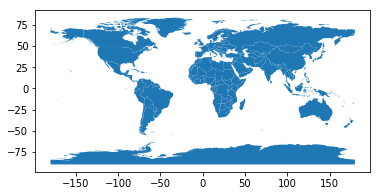

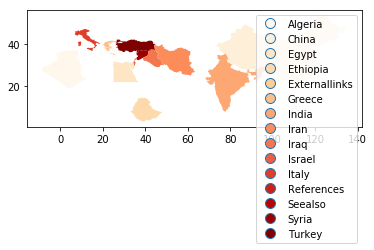

In [15]:
geo_data = gpd.read_file(countries, encoding="utf-8")
country_shapes = geo_data.merge(groups, on='NAME', how='right')
geo_data.plot()
country_shapes.plot('NAME', cmap='OrRd', legend = True)
country_shapes = country_shapes[['NAME', 'geometry']]
country_shapes = country_shapes[pd.notnull(country_shapes['geometry'])]
country_shapes
country_shapes.to_file('country.json', driver='GeoJSON')

# Create Chloropleth using Folium package. Save off as HTML file.  

In [16]:
country_geo = os.path.join('country.json')
m = folium.Map(location=[30.3755321, 69.345116], tiles='stamentoner', zoom_start=3)
m.choropleth(
 geo_data=country_geo,
 name='choropleth',
 data=groups,
 columns=['NAME', 'Library'],
 key_on='feature.properties.NAME',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.0,
 legend_name='Libraries'
)
folium.LayerControl().add_to(m)
m.save(outfile= "Countries_LibraryCNT.html")
os.remove("country.json")
m




C:\Users\fcmun\Anaconda3\lib\site-packages\folium\folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Extra Stuff

In [13]:
##geo_data.to_file('country.geojson', driver='GeoJSON')
##country_geo = os.path.join('country.geojson')
##https://deparkes.co.uk/2016/06/10/folium-map-tiles/
##https://stackoverflow.com/questions/53571106/choropleth-with-folium
##https://stackoverflow.com/questions/16842001/copy-text-between-parentheses-in-pandas-dataframe-column-into-another-column
##https://stackoverflow.com/questions/22588316/pandas-applying-regex-to-replace-values
##https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html
##https://stackoverflow.com/questions/15857797/bc-dates-in-python
##https://stackoverflow.com/questions/43089275/numpy-where-with-like-operator
